## ATTRITION CLASSIFICATION


### IMPORTING DEPENDIES

In [55]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

### LOADING DATASET

In [56]:
df=pd.read_csv('C:\\Users\\USER\\DA\\data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [58]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000


In [59]:
df.isnull().sum()

Age                  0
Attrition            0
BusinessTravel       0
DailyRate            0
Department           0
                  ... 
Unnamed: 64       1469
Unnamed: 65       1469
Unnamed: 66       1469
Unnamed: 67       1469
Unnamed: 68       1469
Length: 69, dtype: int64

In [60]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',

In [61]:
df.drop(columns=['Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
       'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68'],
        inplace= True
      )

In [62]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [64]:
df.shape

(1470, 35)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Histplot

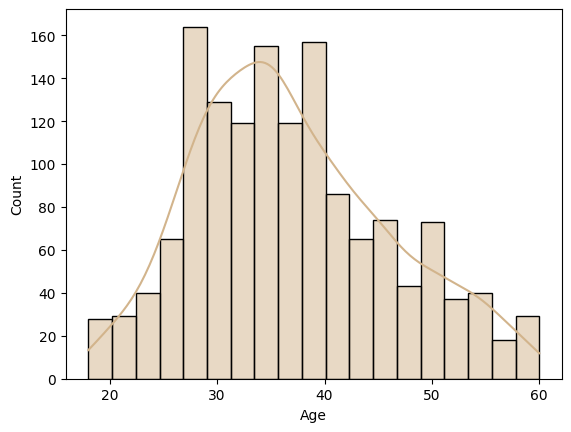

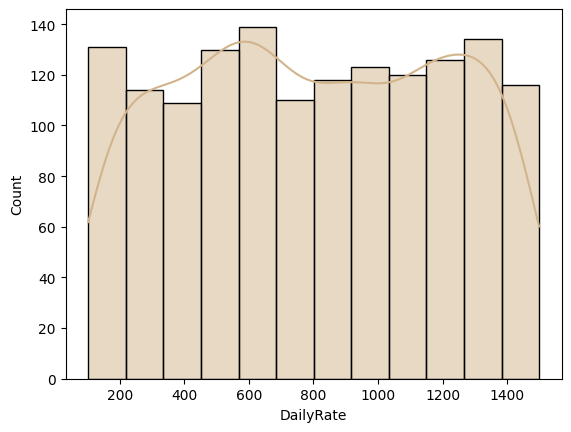

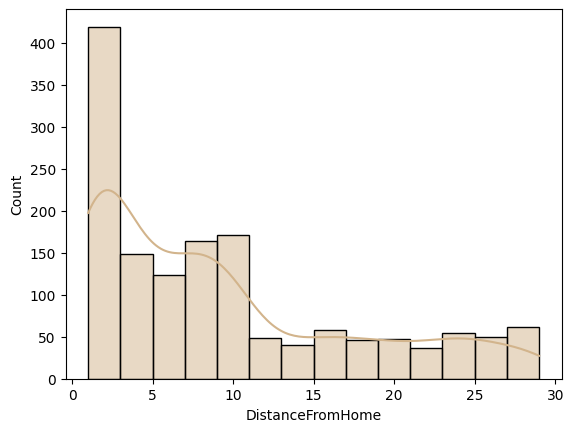

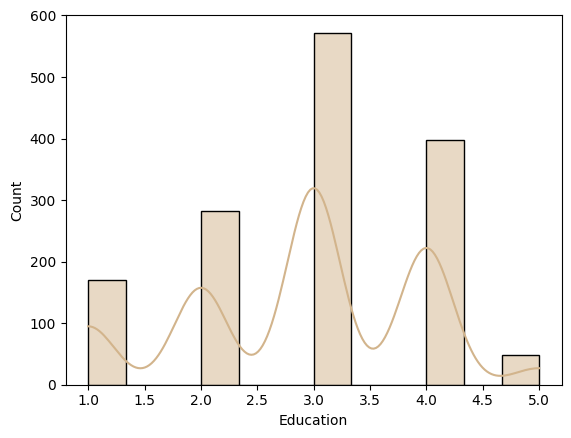

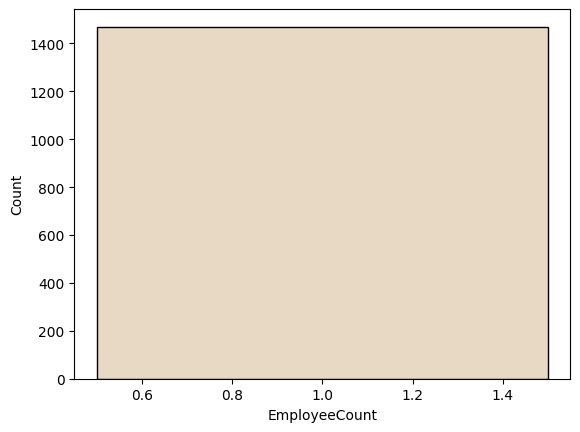

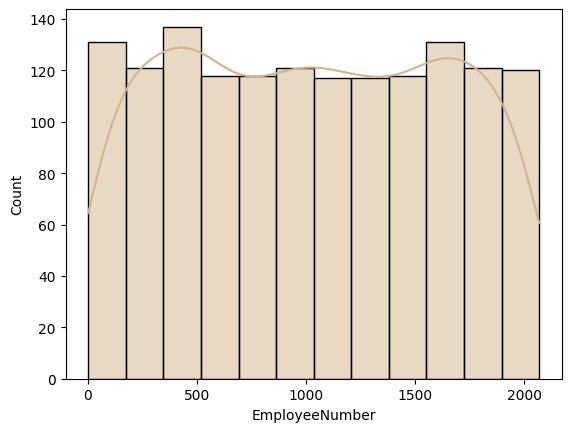

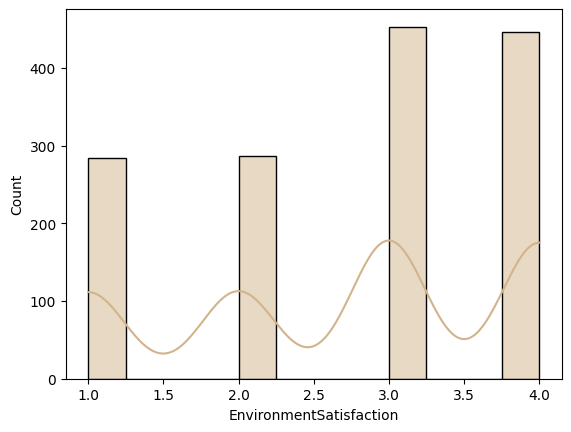

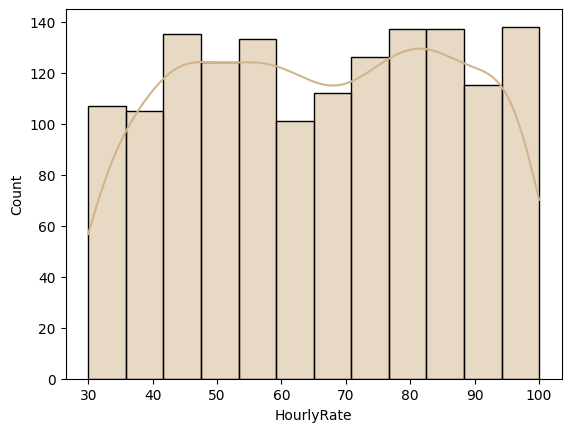

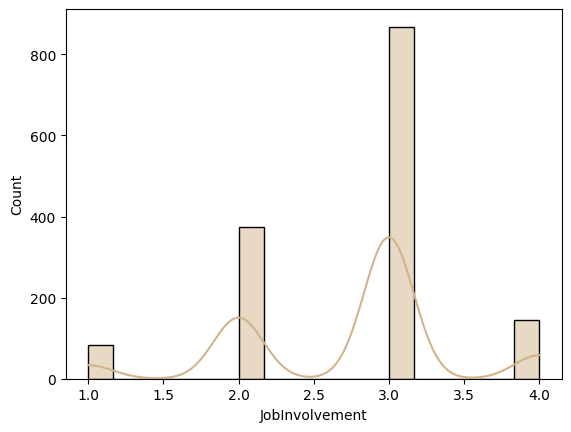

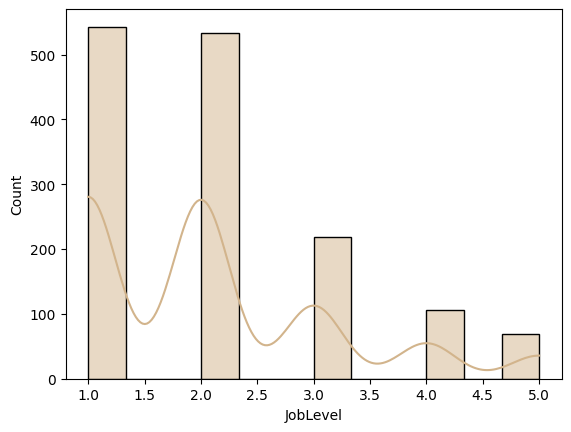

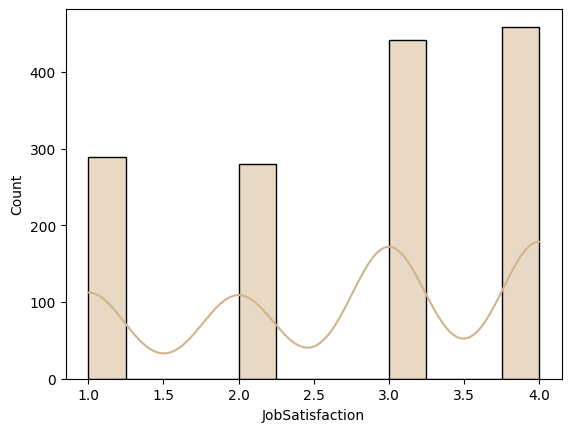

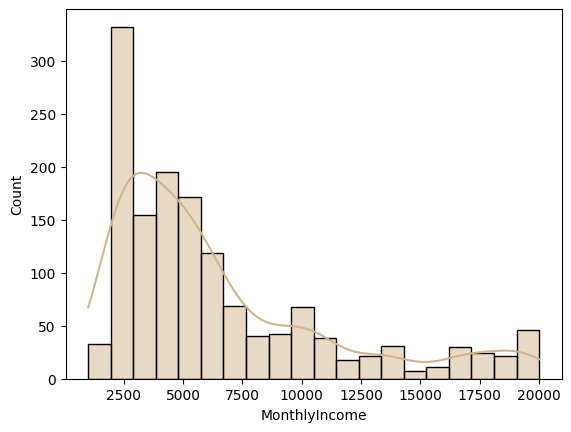

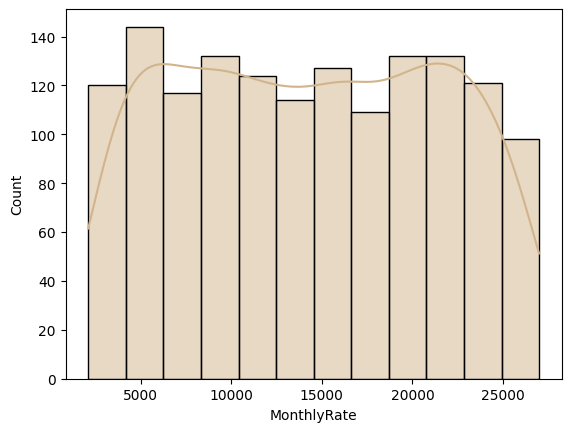

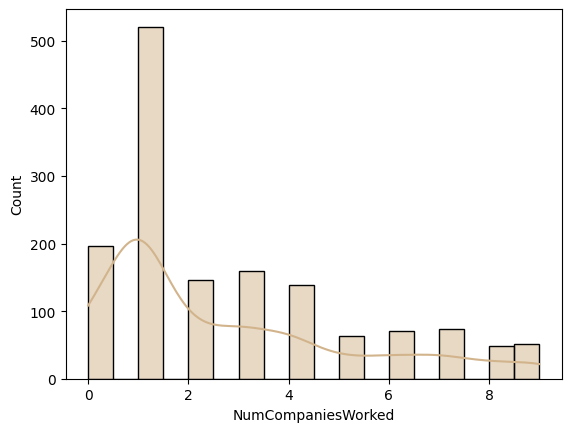

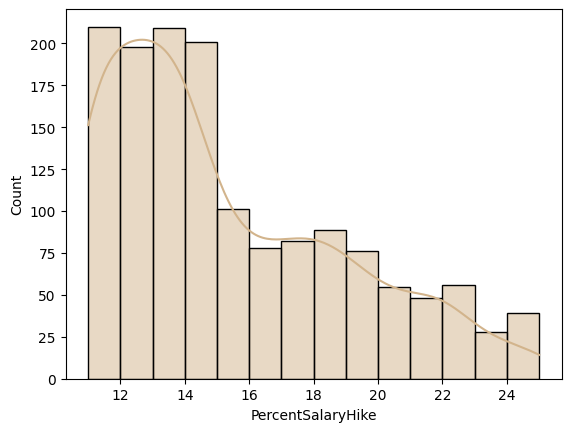

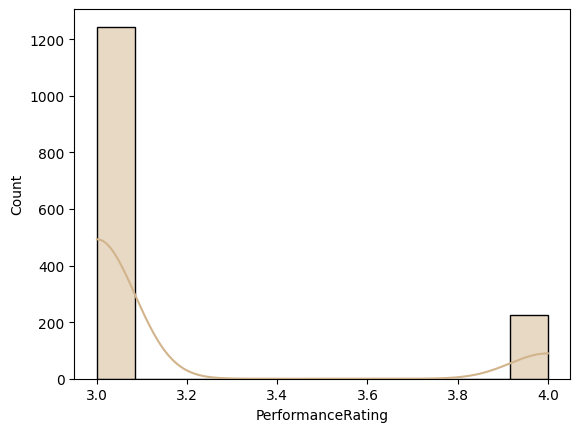

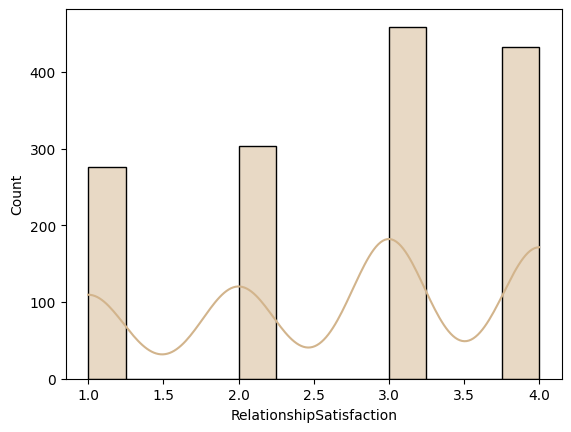

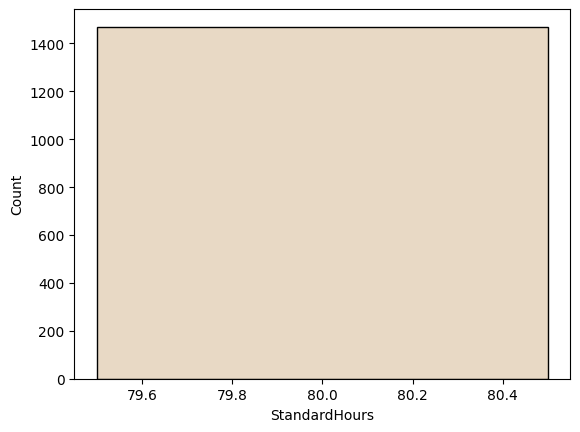

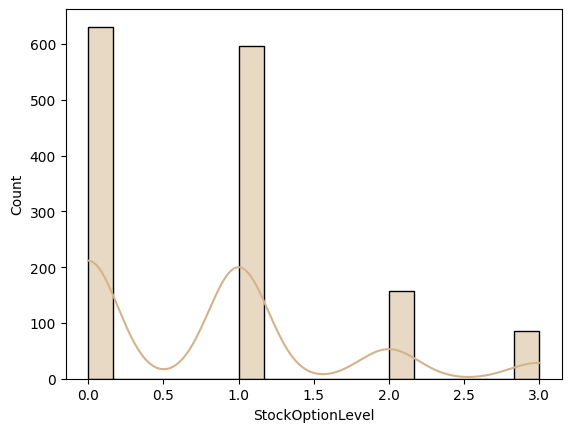

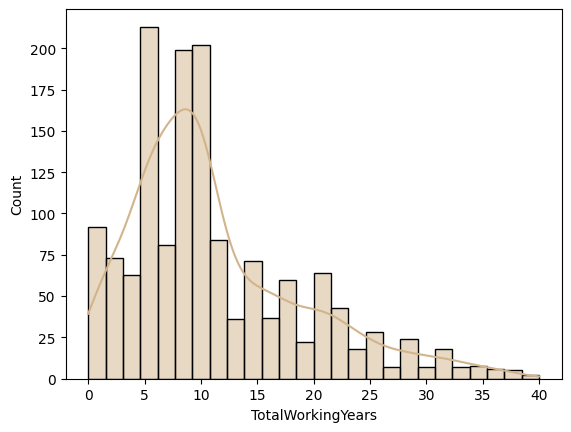

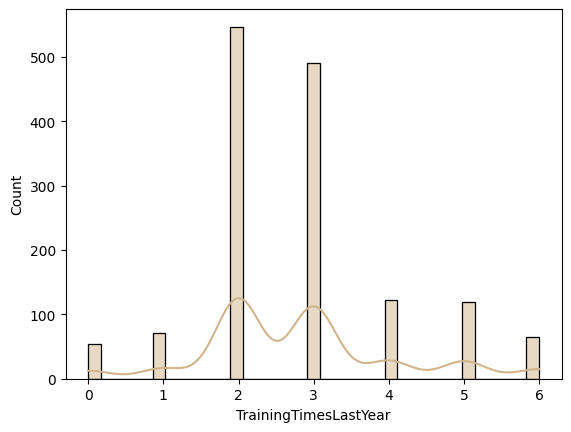

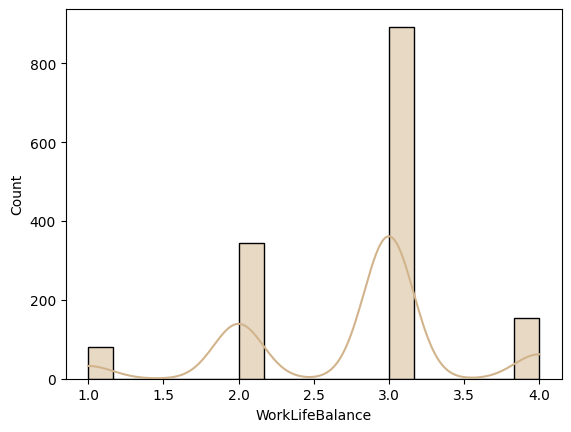

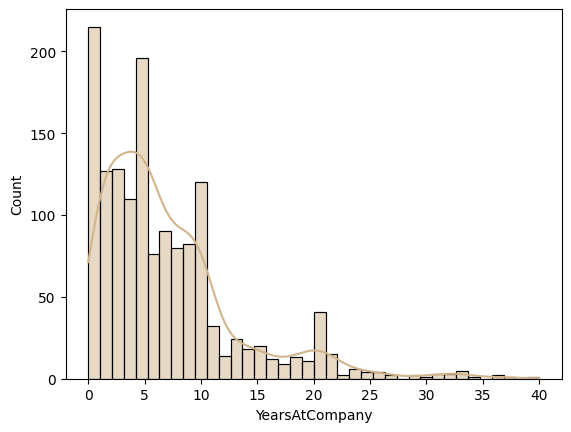

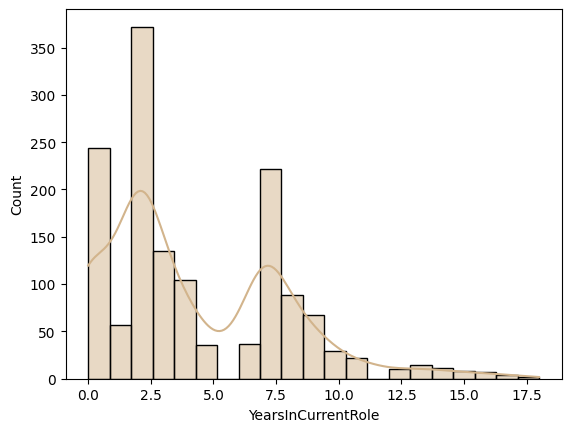

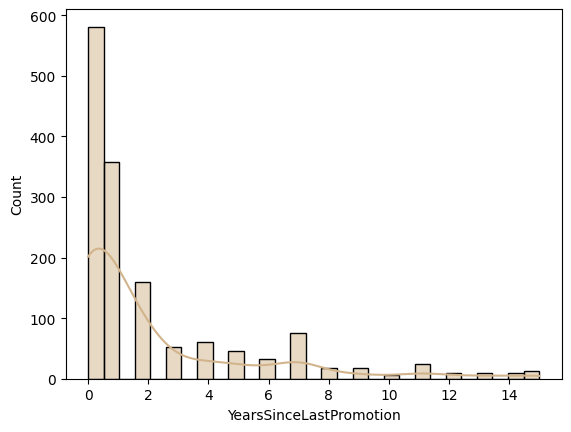

In [67]:
for column in df.columns:
    if df[column].dtype !="object":
        sns.histplot(df, x=df[column], kde= True, color= 'tan')
        plt.show()

## Box Plot

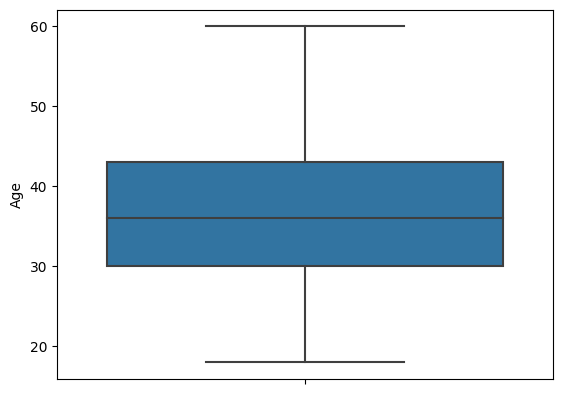

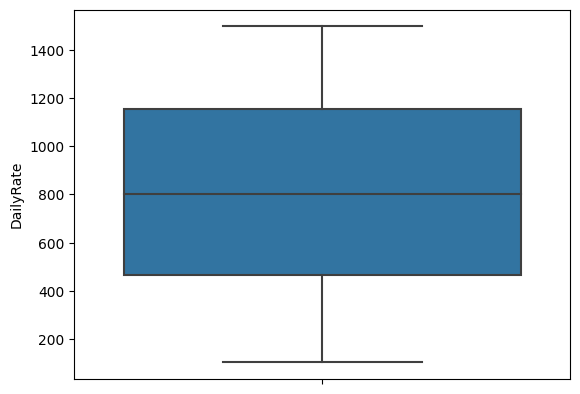

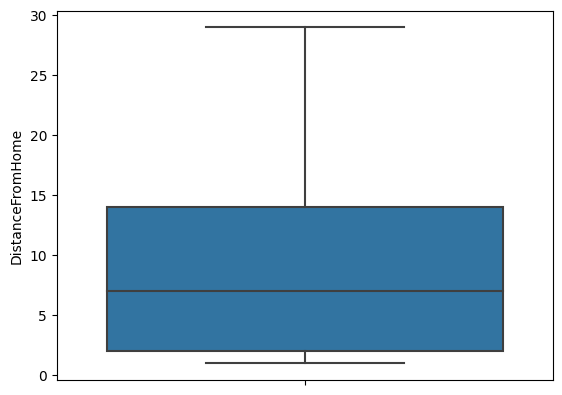

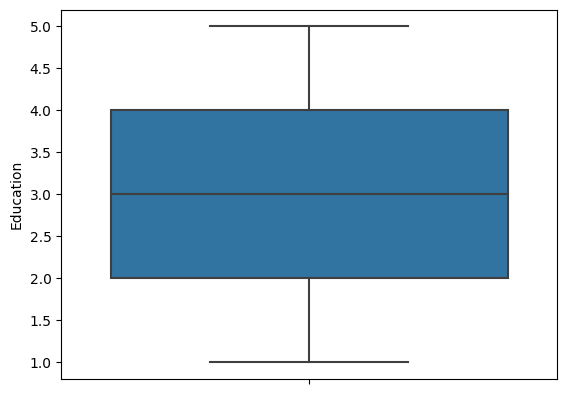

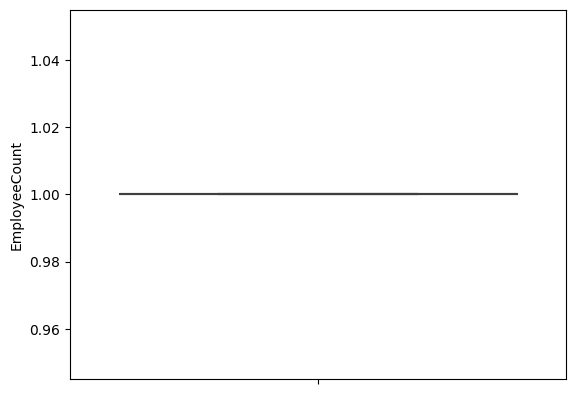

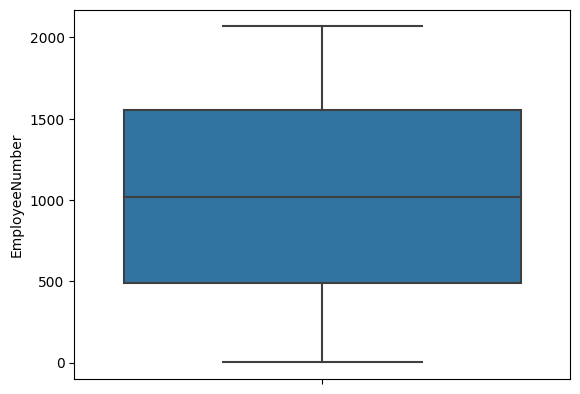

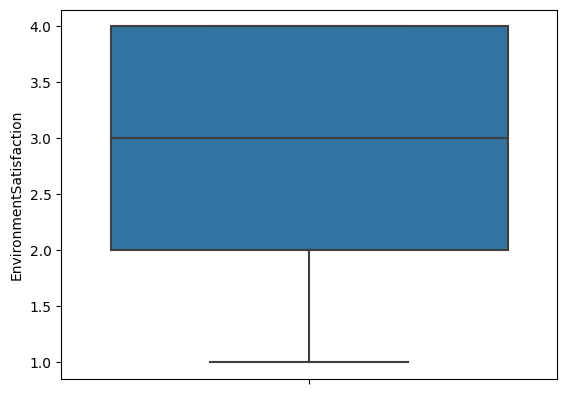

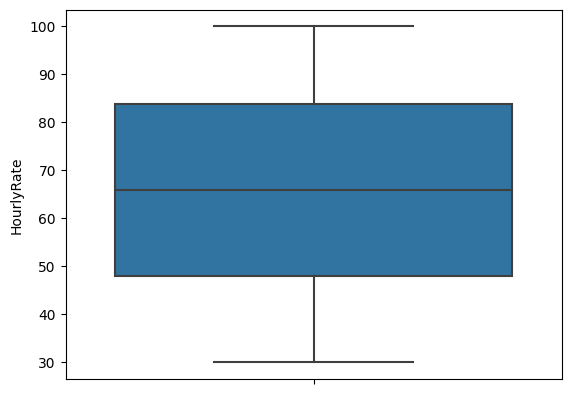

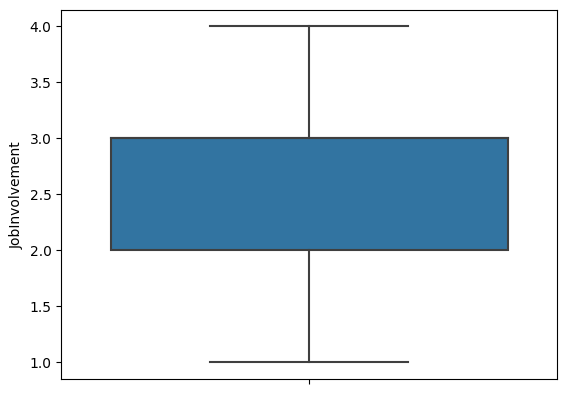

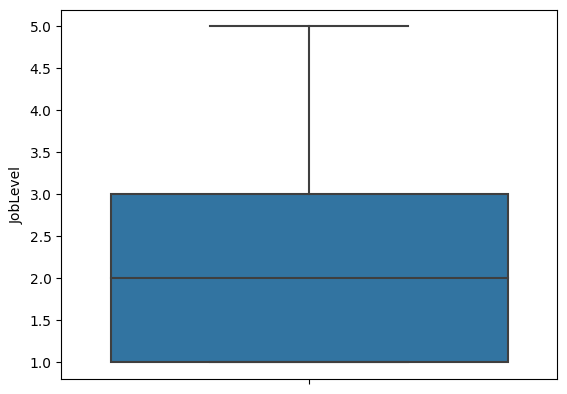

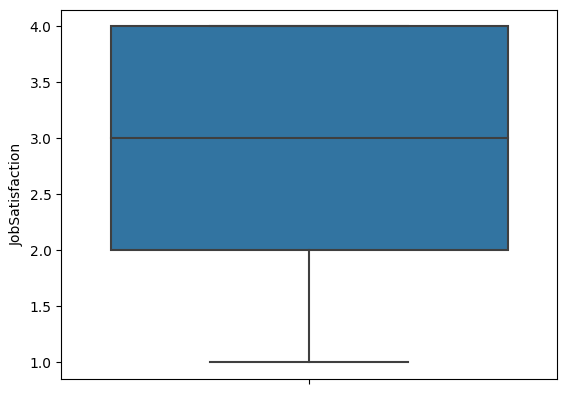

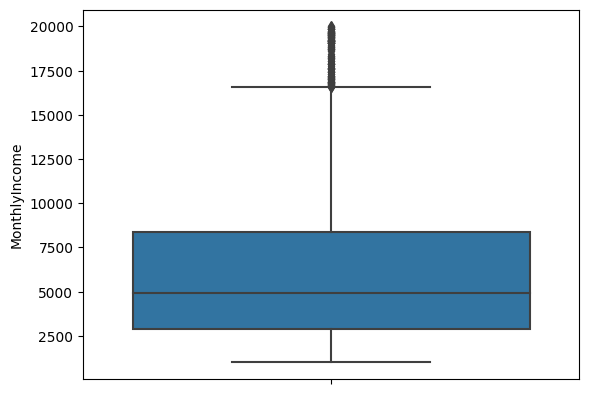

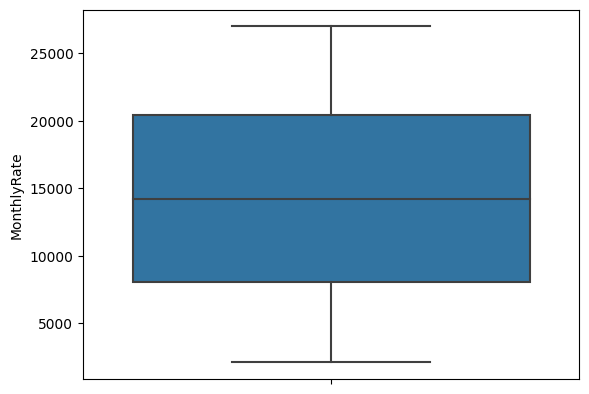

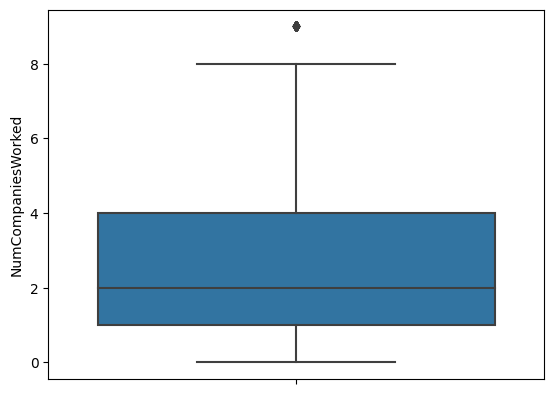

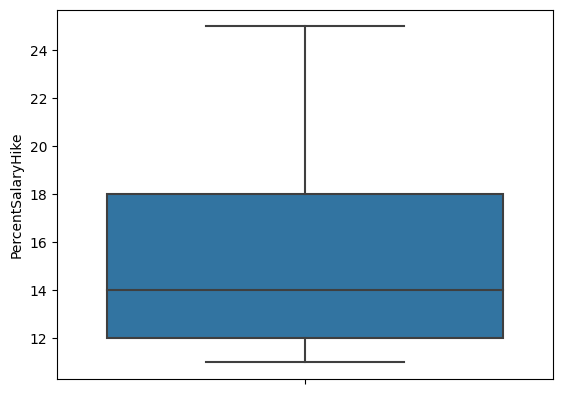

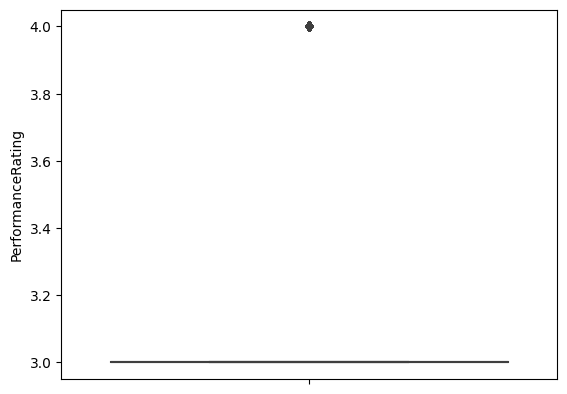

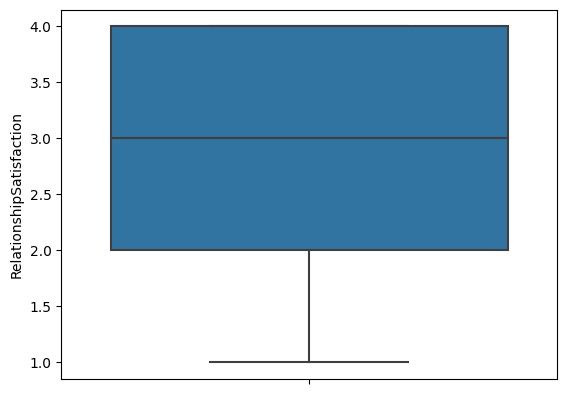

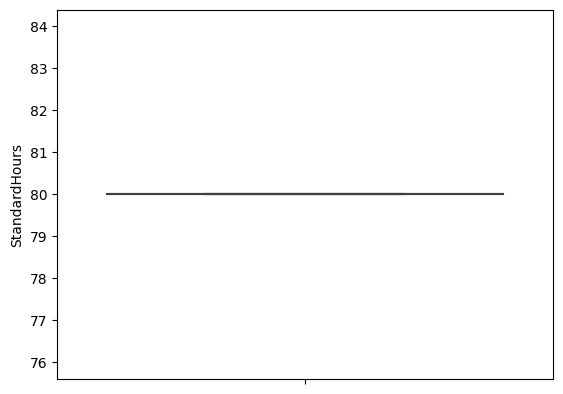

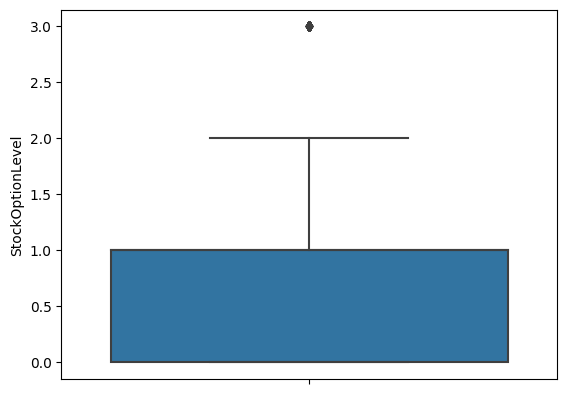

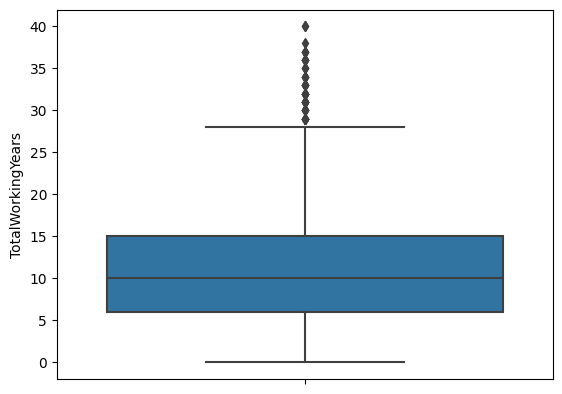

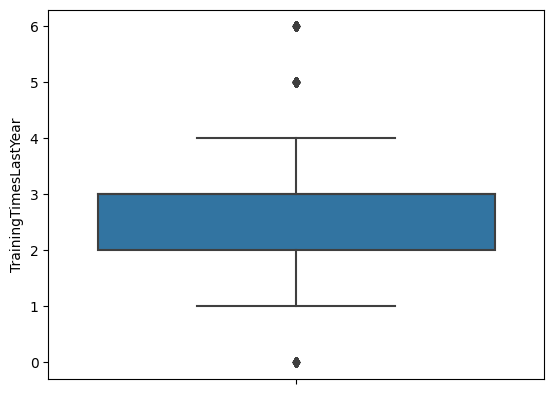

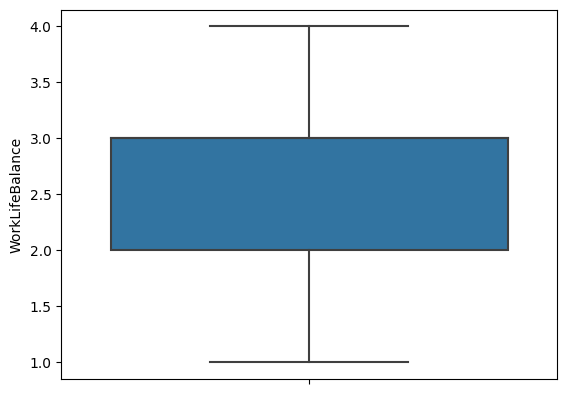

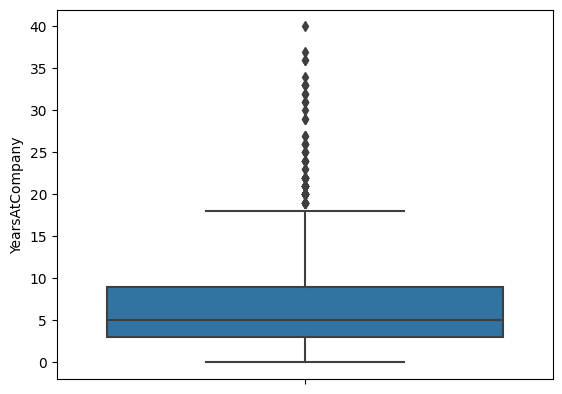

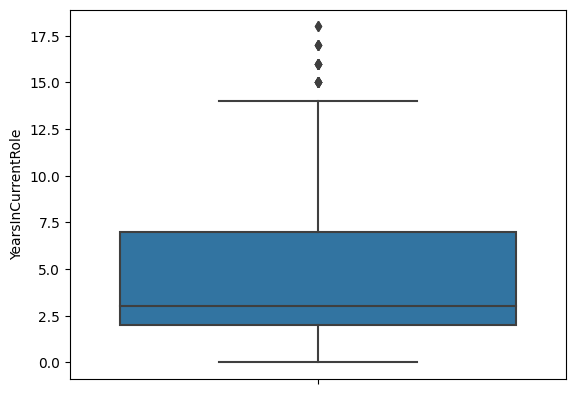

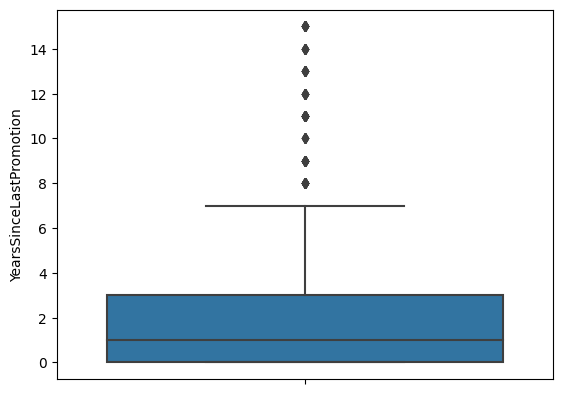

In [68]:
for column in df.columns:
    if df[column].dtype!="object":
        sns.boxplot(y= df[column])
        plt.show()

### TREATING OUTLIERS

In [69]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [70]:
for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

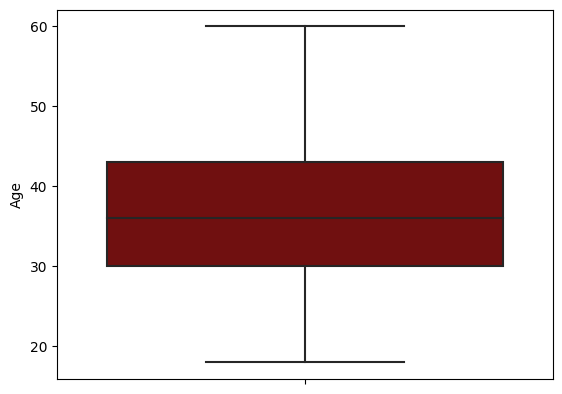

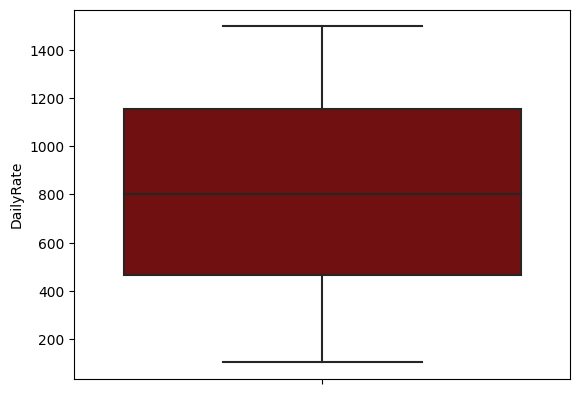

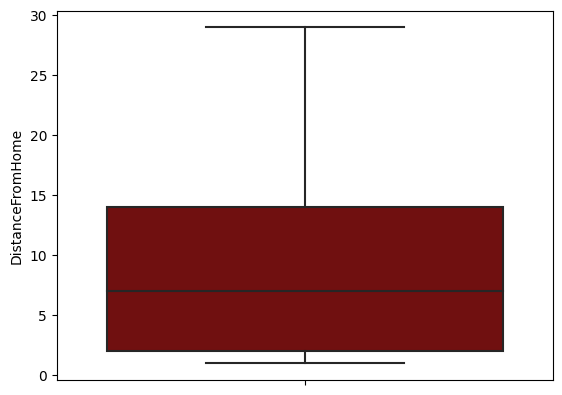

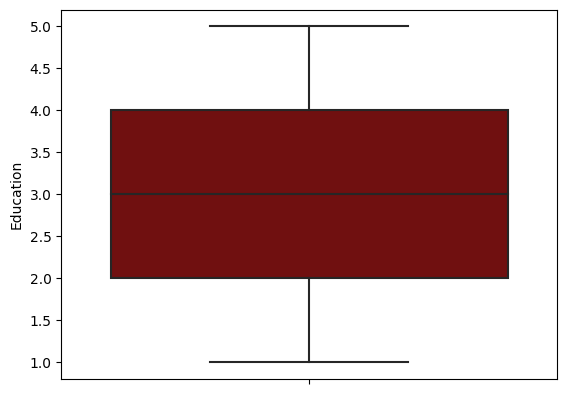

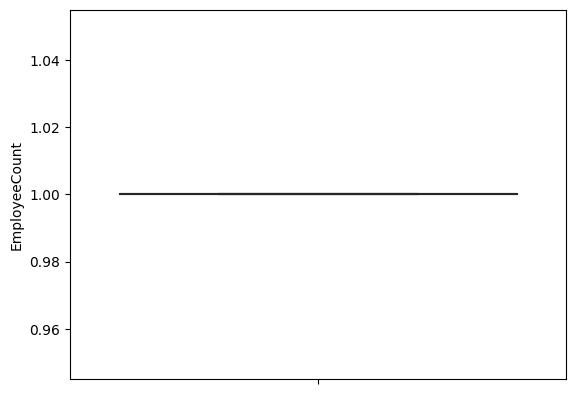

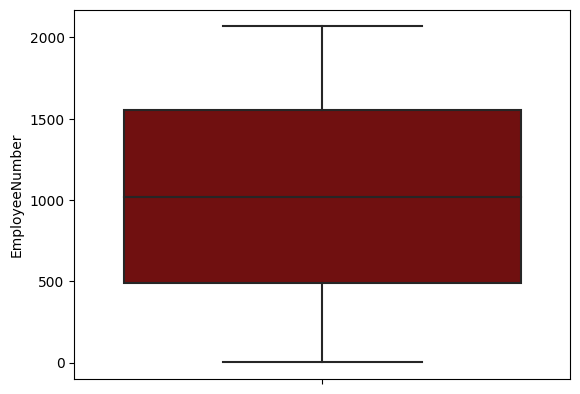

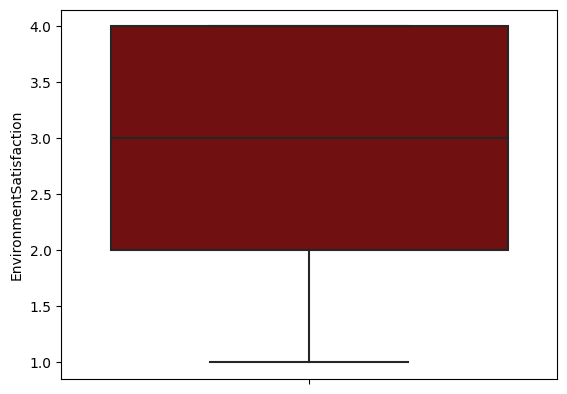

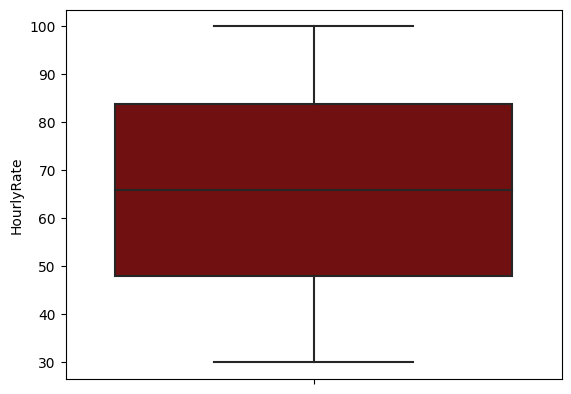

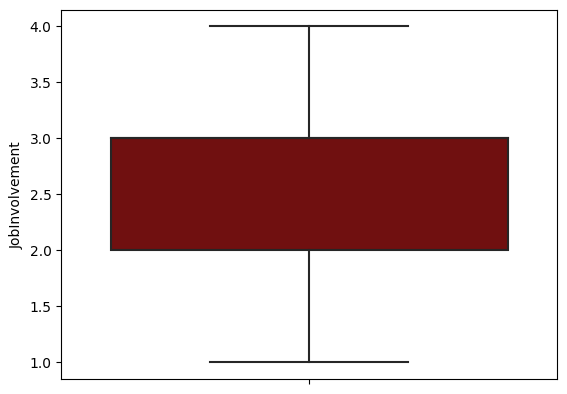

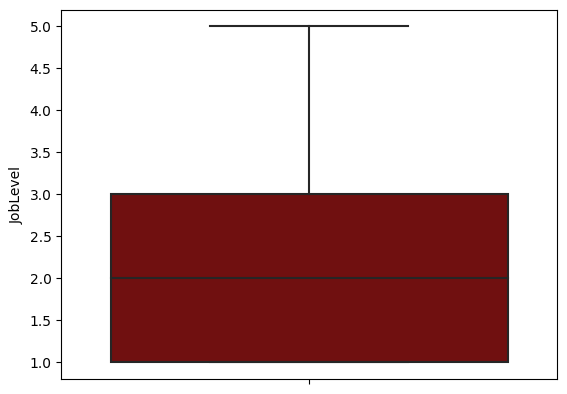

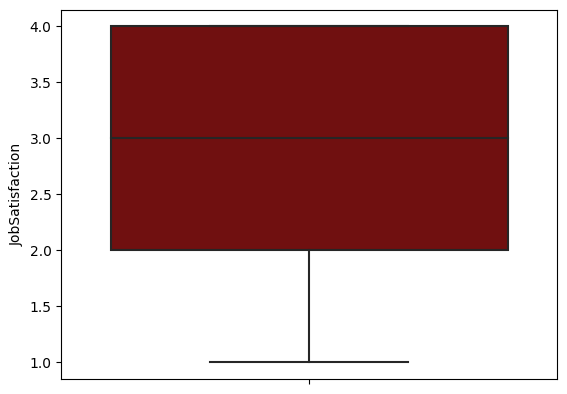

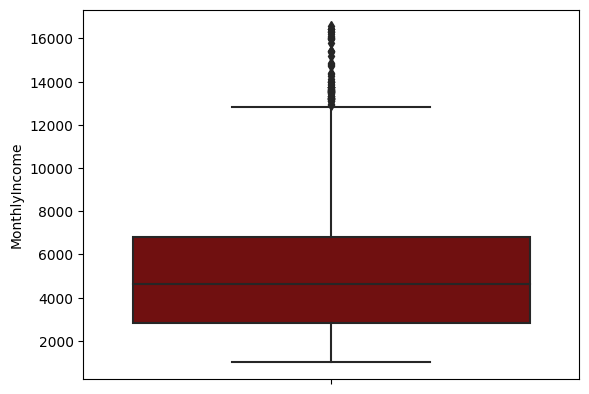

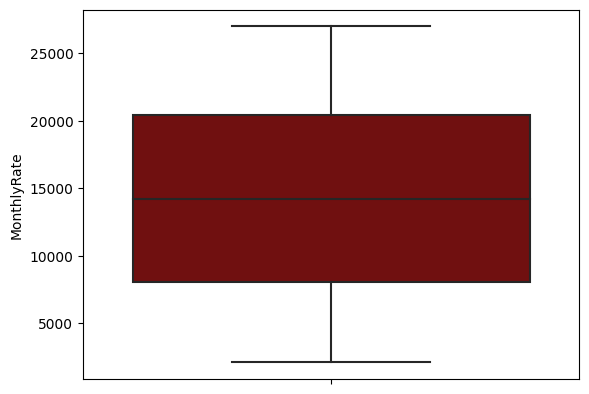

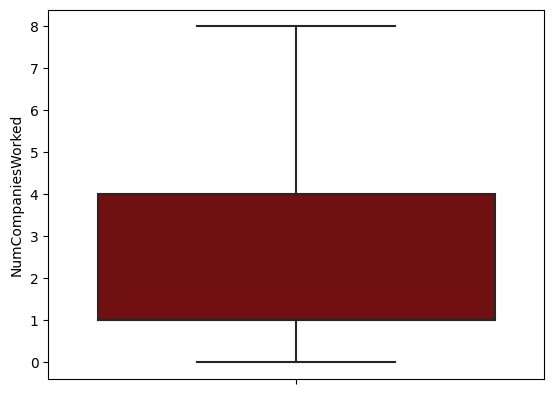

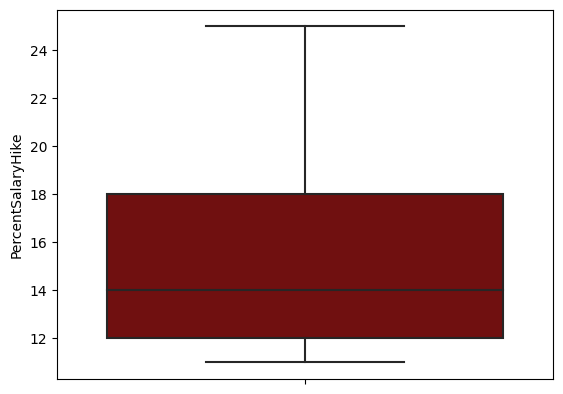

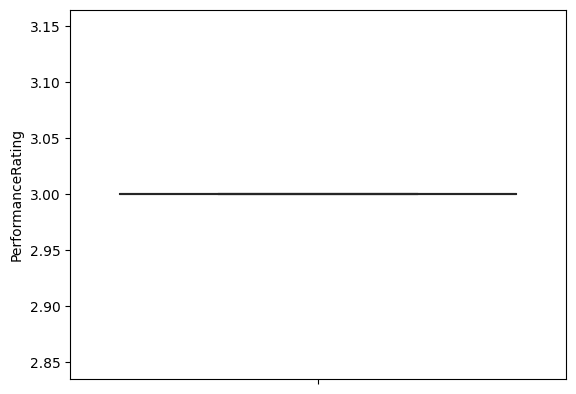

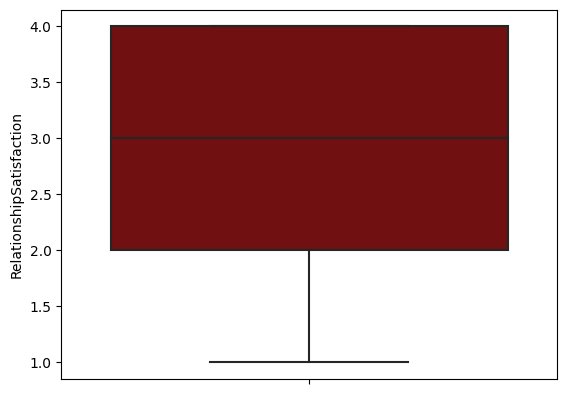

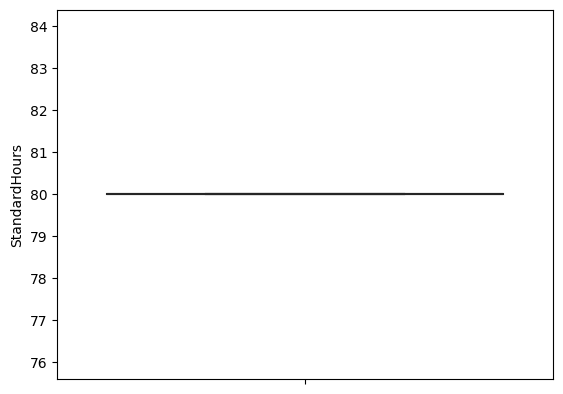

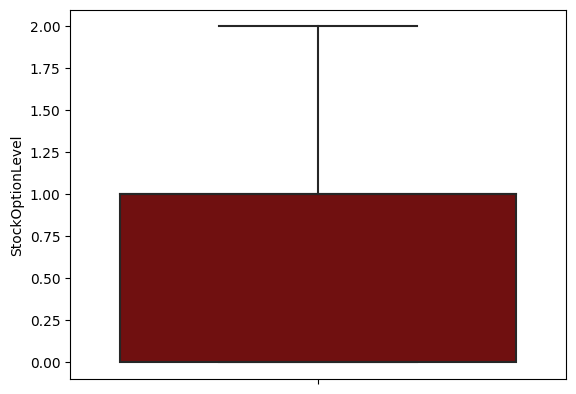

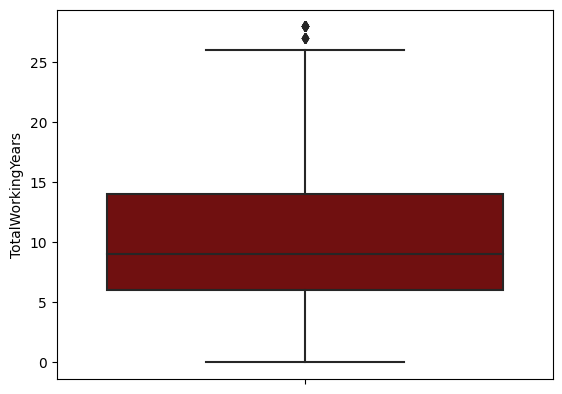

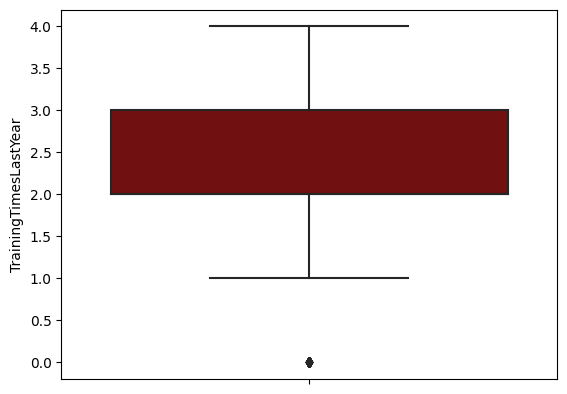

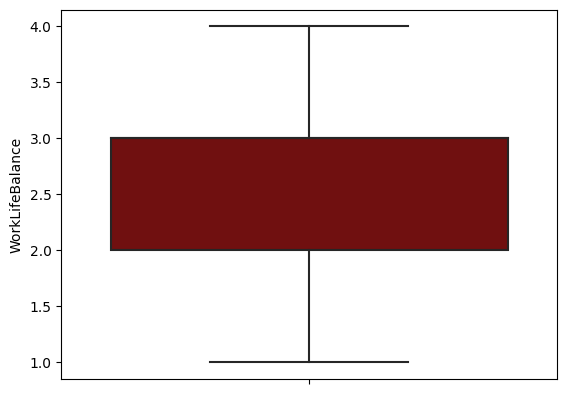

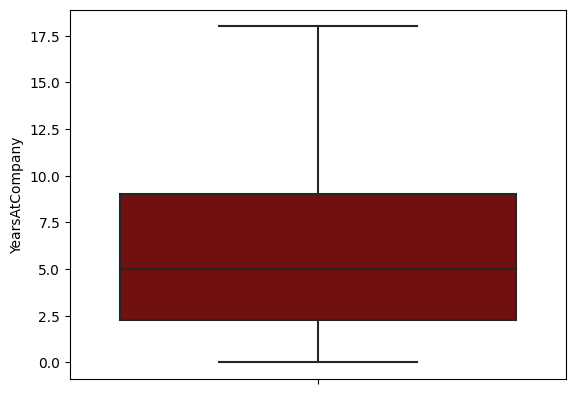

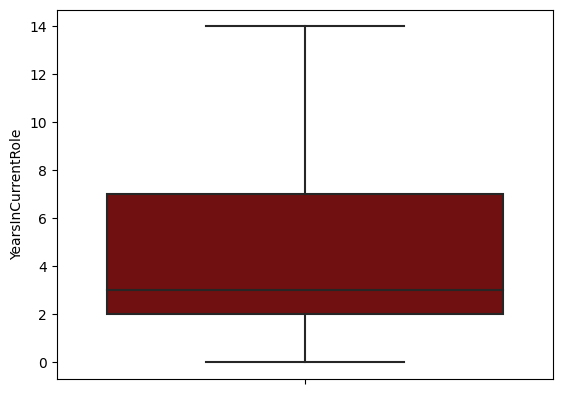

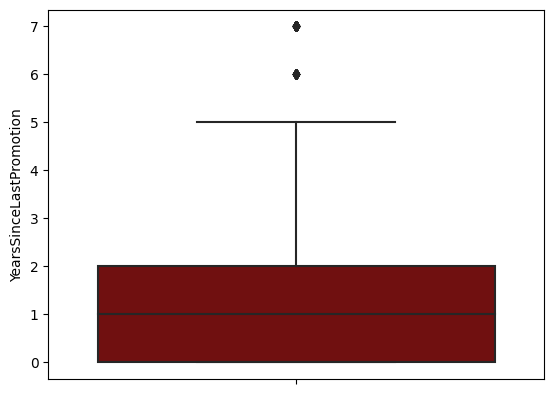

In [71]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column], color="maroon")
        plt.show()

In [72]:
df.isnull().mean()*100

Age                          0.000000
Attrition                    0.000000
BusinessTravel               0.000000
DailyRate                    0.000000
Department                   0.000000
DistanceFromHome             0.000000
Education                    0.000000
EducationField               0.000000
EmployeeCount                0.000000
EmployeeNumber               0.000000
EnvironmentSatisfaction      0.000000
Gender                       0.000000
HourlyRate                   0.000000
JobInvolvement               0.000000
JobLevel                     0.000000
JobRole                      0.000000
JobSatisfaction              0.000000
MaritalStatus                0.000000
MonthlyIncome                7.755102
MonthlyRate                  0.000000
NumCompaniesWorked           3.537415
Over18                       0.000000
OverTime                     0.000000
PercentSalaryHike            0.000000
PerformanceRating           15.374150
RelationshipSatisfaction     0.000000
StandardHour

In [73]:
df.dropna(inplace= True)

In [74]:
df.isnull().mean()*100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       817 non-null    float64
 1   Attrition                 817 non-null    object 
 2   BusinessTravel            817 non-null    object 
 3   DailyRate                 817 non-null    float64
 4   Department                817 non-null    object 
 5   DistanceFromHome          817 non-null    float64
 6   Education                 817 non-null    float64
 7   EducationField            817 non-null    object 
 8   EmployeeCount             817 non-null    float64
 9   EmployeeNumber            817 non-null    float64
 10  EnvironmentSatisfaction   817 non-null    float64
 11  Gender                    817 non-null    object 
 12  HourlyRate                817 non-null    float64
 13  JobInvolvement            817 non-null    float64
 14  JobLevel 

In [76]:
le= LabelEncoder()

In [77]:
df['YearsWithCurrManager']=le.fit_transform(df['YearsWithCurrManager'])

df['OverTime']=le.fit_transform(df['OverTime'])

df['Over18']=le.fit_transform(df['Over18'])

df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

df['JobRole']=le.fit_transform(df['JobRole'])

df['Gender']=le.fit_transform(df['Gender'])

df['EducationField']=le.fit_transform(df['EducationField'])

df['Department']=le.fit_transform(df['Department'])

df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])

df['Attrition']=le.fit_transform(df['Attrition'])

## Heat Map 

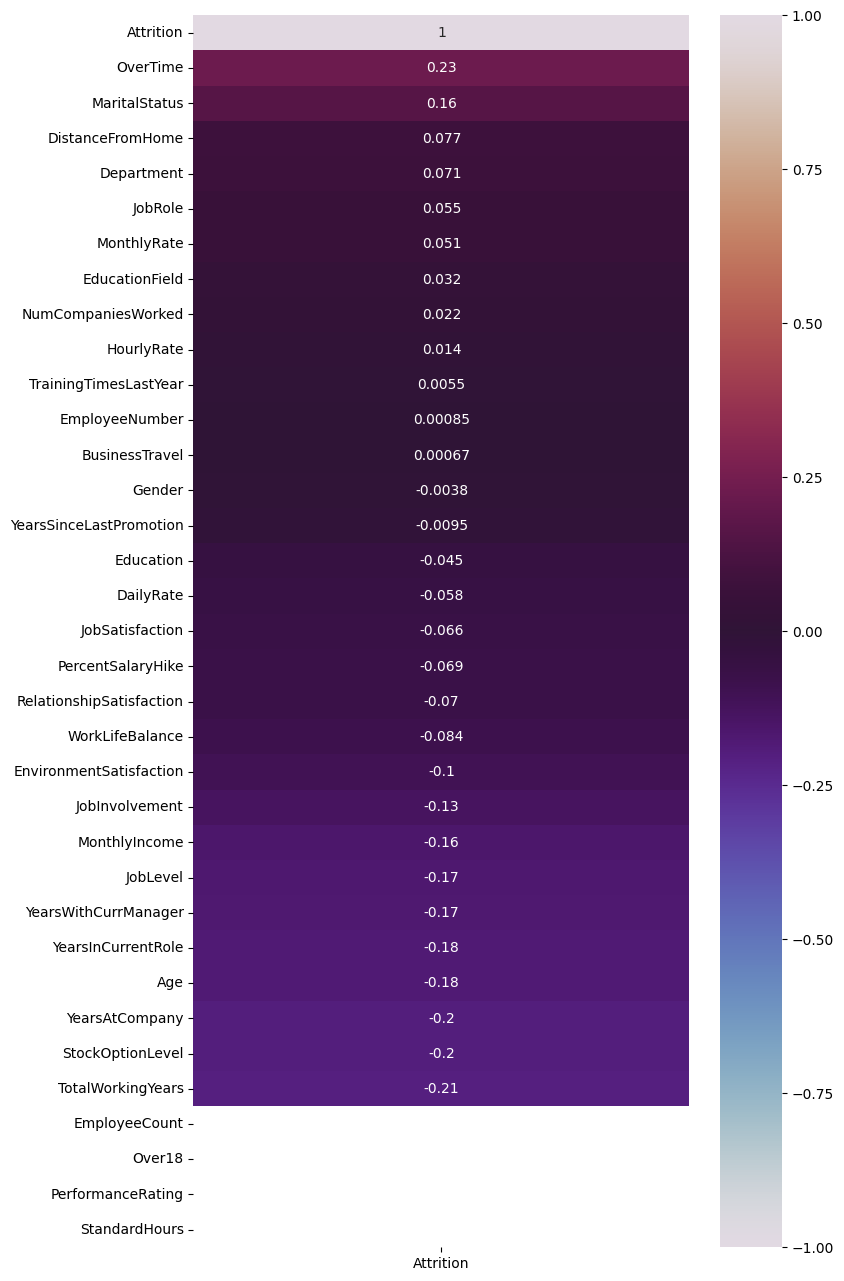

In [79]:
plt.figure(figsize=(8,16))
sns.heatmap(df.corr()[["Attrition"]].sort_values(by="Attrition", ascending=False), vmin=-1, vmax=1,annot=True, cmap="twilight");

In [80]:
x = df[['MaritalStatus', 'OverTime']].values
y = df[['Attrition']].values

### Cross validation

In [81]:
models={
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [82]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, cv=10, n_jobs=-1)
    print("cross validation model : {}".format(name))
    Average_score = np.mean(scores)
    print("Average score: ", Average_score)
    print("*"*100)

cross validation model : DecisionTreeClassifier
Average score:  0.8102830472749172
****************************************************************************************************
cross validation model : SVC
Average score:  0.8200993676603433
****************************************************************************************************
cross validation model : LogisticRegression
Average score:  0.8200993676603433
****************************************************************************************************
cross validation model : AdaBoostClassifier
Average score:  0.8200993676603433
****************************************************************************************************
cross validation model : RandomForestClassifier
Average score:  0.8115025594700391
****************************************************************************************************


#### We may proceed with AdaBoostClassifier

In [83]:
model = AdaBoostClassifier()

In [92]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=65)

In [93]:
model.fit(x_train,y_train)
print("model traines with {}".format(model))
training_score = model.score(x_train, y_train)*100
testing_score = model.score(x_test, y_test)*100
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("*"*100)

model traines with AdaBoostClassifier()
training_score:  82.08269525267994
testing_score:  81.70731707317073
****************************************************************************************************


In [94]:
y_pred = model.predict(x)

In [95]:
OUTPUT= pd.DataFrame(zip(y,y_pred), columns= ("ACTUAL", "PREDICTED"), dtype= float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,1.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
